# Undersampling, SMOTE, and running models

## Read Undersampled_data:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from zipfile import ZipFile
import nbimporter

import performance_measure
import data_sampling
import split_data_set

# The three models
import decision_tree
import svm_method
import random_forest_method

Importing Jupyter notebook from performance_measure.ipynb
Importing Jupyter notebook from data_sampling.ipynb
Importing Jupyter notebook from random_forest_method.ipynb
Importing Jupyter notebook from svm_method.ipynb
Importing Jupyter notebook from split_data_set.ipynb
Importing Jupyter notebook from decision_tree.ipynb


In [2]:
path = "../../../undersampled_data.zip"

zip_file = ZipFile(path)
undersampled_data = pd.read_csv(zip_file.open('undersampled_data.csv')) #, nrows=500000)
#data = pd.read_csv(path, compression='zip', sep=',')#, nrows=500000)

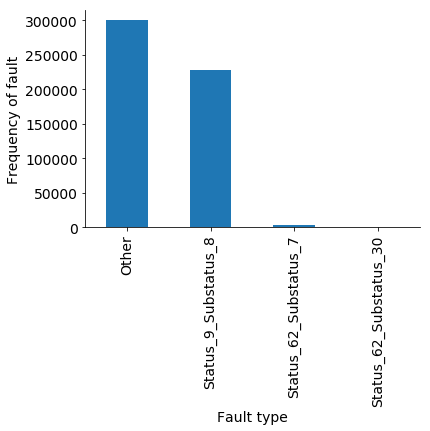

<Figure size 1440x1152 with 0 Axes>

In [3]:
data_sampling.plot_balance(undersampled_data, 'Status')

In [4]:
print(undersampled_data['Status'].value_counts())

Other                     300000
Status_9_Substatus_8      228668
Status_62_Substatus_7       4098
Status_62_Substatus_30       383
Name: Status, dtype: int64


## Do more undersampling

In [ ]:
undersampled_data = data_sampling.undersample_dataset(undersampled_data,20000,"Other")
undersampled_data = data_sampling.undersample_dataset(undersampled_data,20000,"Status_9_Substatus_8")

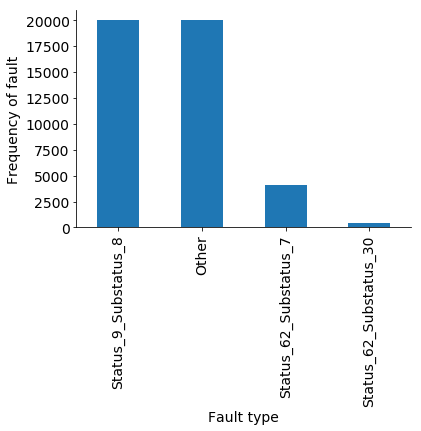

<Figure size 1440x1152 with 0 Axes>

In [ ]:
data_sampling.plot_balance(undersampled_data, 'Status')

In [ ]:
undersampled_data.head()

,TimeStamp,WindVane,WindSpeed,RotorSpeed,NacelleDirection,ActivePower,Spinner-Temperature,Log-T-Raw-FrontBearingTemperature,Log-T-Raw-RearBearingTemperature,Log-T-Raw-BladeAPitchHeatSink,...,Log-T-Raw-Rectifier2HeatSink,Log-T-Raw-RectifierCabinetTemperature,Log-T-Raw-ExcitationHeatSink,Ambient-Temperature,Log-T-Raw-TowerTemperature,Log-T-Raw-ControlCabinetTemperature,Log-T-Raw-TransformerTemperature,Average blade angle across A B C,WindDirection,Status
0,13-08-2019 10:56:30,-4.800000,12.0,11.929999,220.0,0.0,24.0,30.0,31.0,26.0,...,70.0,37.0,46.0,12.0,19.0,22.0,38.0,21.090000,215.199997,Status_9_Substatus_8
1,14-12-2018 19:19:00,70.700005,0.9,0.000000,358.0,0.0,3.0,5.0,7.0,11.0,...,9.0,19.0,20.0,1.0,4.0,16.0,22.0,60.049999,-68.700005,Status_9_Substatus_8
2,17-07-2018 17:05:30,-7.600000,5.2,10.520000,331.0,131.0,34.0,41.0,40.0,37.0,...,55.0,46.0,47.0,23.0,-2.0,41.0,57.0,1.000000,323.399994,Other
3,27-06-2019 18:13:00,-1.000000,3.7,8.830000,254.0,78.0,22.0,35.0,31.0,22.0,...,45.0,35.0,41.0,8.0,-20.0,21.0,37.0,1.000000,253.000000,Status_9_Substatus_8
4,23-05-2019 16:58:30,12.300000,1.3,0.100000,342.0,0.0,23.0,25.0,26.0,29.0,...,21.0,31.0,23.0,13.0,16.0,23.0,38.0,60.049999,354.299988,Status_9_Substatus_8


In [ ]:
X = undersampled_data.drop(columns = ['Status', 'TimeStamp'])
y = undersampled_data.Status
y.shape

(44481,)

In [ ]:
y.value_counts()

Status_9_Substatus_8      20000
Other                     20000
Status_62_Substatus_7      4098
Status_62_Substatus_30      383
Name: Status, dtype: int64

## Split into training and test

In [ ]:
X_train, X_test, y_train, y_test = split_data_set.split_data(X,y)

In [ ]:
columns_for_data = X_train.columns

In [ ]:
y_train.value_counts()

Status_9_Substatus_8      13400
Other                     13400
Status_62_Substatus_7      2746
Status_62_Substatus_30      256
Name: Status, dtype: int64

In [ ]:
y_test.value_counts()

Status_9_Substatus_8      6600
Other                     6600
Status_62_Substatus_7     1352
Status_62_Substatus_30     127
Name: Status, dtype: int64

## Random forest and feature importance

Normalized confusion matrix
[[9.87575758e-01 3.03030303e-04 3.03030303e-03 9.09090909e-03]
 [1.57480315e-01 8.42519685e-01 0.00000000e+00 0.00000000e+00]
 [2.21893491e-03 0.00000000e+00 9.97781065e-01 0.00000000e+00]
 [1.72727273e-02 0.00000000e+00 1.51515152e-04 9.82575758e-01]]


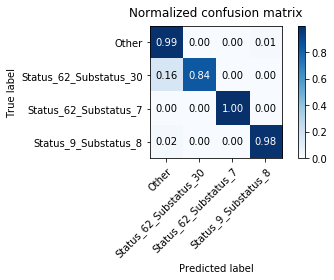

Total Accuracy 		0.985

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
Other                     	 0.979 		 0.988 		 0.983
Status_62_Substatus_30    	 0.982 		 0.843 		 0.907
Status_62_Substatus_7     	 0.985 		 0.998 		 0.991
Status_9_Substatus_8      	 0.991 		 0.983 		 0.987


In [ ]:
rf = random_forest_method.get_rf_model(X_train, X_test, y_train, y_test)

In [ ]:
rf

,importance
ActivePower,0.162597
Log-T-Raw-Rectifier1HeatSink,0.083453
Log-T-Raw-TransformerTemperature,0.069904
Log-T-Raw-Rotor2Temperature,0.063931
Log-T-Raw-Rotor1Temperature,0.044546
Log-T-Raw-Stator2Temperature,0.041546
Log-T-Raw-Rectifier2HeatSink,0.037996
Log-T-Raw-Stator1Temperature,0.037608
Log-T-Raw-NacelleAmbientTemperature,0.032311
Log-T-Raw-RearBearingTemperature,0.030254


## Scale dataset for SVM

In [ ]:
from sklearn.preprocessing import MinMaxScaler

from sklearn import preprocessing

scaler  = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled.shape)
print(X_test_scaled.shape)

X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_train_scaled_df.columns = columns_for_data
X_train_scaled_df.head()


(29802, 34)
(14679, 34)


,WindVane,WindSpeed,RotorSpeed,NacelleDirection,ActivePower,Spinner-Temperature,Log-T-Raw-FrontBearingTemperature,Log-T-Raw-RearBearingTemperature,Log-T-Raw-BladeAPitchHeatSink,Log-T-Raw-BladeBPitchHeatSink,...,Log-T-Raw-Rectifier1HeatSink,Log-T-Raw-Rectifier2HeatSink,Log-T-Raw-RectifierCabinetTemperature,Log-T-Raw-ExcitationHeatSink,Ambient-Temperature,Log-T-Raw-TowerTemperature,Log-T-Raw-ControlCabinetTemperature,Log-T-Raw-TransformerTemperature,Average blade angle across A B C,WindDirection
0,0.459054,0.057377,0.226707,0.231198,0.000000,0.618421,0.616279,0.324675,0.746667,0.767123,...,0.354839,0.395349,0.740741,0.404255,0.541667,0.542169,0.42,0.330097,0.000000,0.407354
1,0.985548,0.019126,0.000000,0.364903,0.000000,0.421053,0.476744,0.246753,0.546667,0.575342,...,0.150538,0.174419,0.407407,0.095745,0.270833,0.373494,0.32,0.233010,0.636197,0.884985
2,0.481723,0.062842,0.264062,0.133705,0.000416,0.434211,0.465116,0.253247,0.520000,0.547945,...,0.193548,0.220930,0.481481,0.329787,0.291667,0.361446,0.48,0.203883,0.000000,0.352196
3,0.486540,0.226776,0.089309,0.969359,0.000000,0.552632,0.534884,0.311688,0.613333,0.630137,...,0.139785,0.162791,0.444444,0.053191,0.291667,0.421687,0.20,0.407767,0.636520,0.968539
4,0.494758,0.344262,0.705453,0.345404,0.208663,0.657895,0.767442,0.376623,0.760000,0.780822,...,0.666667,0.720930,0.703704,0.489362,0.645833,0.650602,0.56,0.398058,0.213970,0.516854


## SVM method

### BALANCED SVM

In [ ]:
# Balanced
svm1 = svm_method.get_svm_model_balanced(X_train_scaled, X_test_scaled, y_train, y_test)

Loading...
Training...


### UNBALANCED SVM

In [ ]:
# Unbalanced
svm2 = svm_method.get_svm_model(X_train_scaled, X_test_scaled, y_train, y_test)

### SMOTE (Synthetic Minority Oversampling Technique)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_train_scaled_smote ,y_train_smote = sm.fit_resample(X_train_scaled, y_train)


X_test_scaled_smote ,y_test_smote = sm.fit_resample(X_test_scaled, y_test)

In [ ]:
y1 = pd.DataFrame(X_train_scaled_smote)
y1[0].value_counts()

### SMOTE and unbalanced weights (USE THIS RESULT Best results for 62_30)!

In [ ]:
svm3 = svm_method.get_svm_model(X_train_scaled_smote, X_test_scaled_smote, y_train_smote, y_test_smote)

### SMOTE and class_weight balanced

In [ ]:
# balanced with smote and undersampling
svm4 = svm_method.get_svm_model_balanced(X_train_scaled_smote, X_test_scaled_smote, y_train, y_test)

## Decision tree model

In [ ]:
# Remove the features from the random forest model called rf
rf_df = pd.DataFrame(rf)
rf_df_extracted = rf_df.head(6)
rf_df_extracted.reset_index()
include_features = rf_df_extracted.index
list_of_features = include_features.tolist()

# The selected features in a list
df_selected_features = pd.DataFrame(list_of_features)
df_selected_features.columns = ['Selected features for decision tree']
df_selected_features


In [ ]:
import numpy as np

X_train_scaled_with_names = (pd.DataFrame(X_train_scaled))
X_train_scaled_with_names.columns = columns_for_data

X_test_scaled_with_names = (pd.DataFrame(X_test_scaled))
X_test_scaled_with_names.columns = columns_for_data

# data = X_train_scaled_with_names[np.intersect1d(X_train_scaled_with_names, list_of_features)]


X_train_scaled_removed = X_train_scaled_with_names[include_features.tolist()]
X_test_scaled_removed = X_test_scaled_with_names[include_features.tolist()]

# Printing df
X_test_scaled_removed.head()

In [ ]:
# Train DT on these features and print it out:
dt = decision_tree.get_decision_tree_model(X_train_scaled_removed, X_test_scaled_removed, y_train, y_test)
print("depth",dt.get_depth())

In [ ]:
# Print the tree
import pydotplus
from sklearn.datasets import load_iris
from sklearn import tree
import collections


dot_data = tree.export_graphviz(dt,
                                feature_names=X_test_scaled_removed.columns,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('brown', 'forestgreen')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

# Exporting image to current directory
graph.write_png('tree2.png')